#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Ensemble Learning: combinação de métodos**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#1 Métodos ensemble

Ensemble learning está relacionado com a combinação de diferentes métodos de aprendizado para melhorar sua capacidade em relação aos resultados obtidos individualmente.

---

Nas seções a seguir é apresentada uma visão geral dos métodos *ensemble learning* e implementações das abordagens *bagging*, *AdaBoost* e *Gradient Boosting*. O método *ensemble* denominado [*Decision Trees*](https://github.com/janiosl/python.ds/blob/master/ml/randomForest/ML_RandomForest.ipynb) será estudo em um notebook separado.

##1.1 Classificadores de votação

 Uma das principais vantagens dos classificadores de votação usando a abordagem *ensemble learning* é sua capacidade de melhorar a acurácia dos modelos quando comparados às suas versões individuais (não combinadas por *ensemble*) [Bauer and Kohavi, 1998].

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

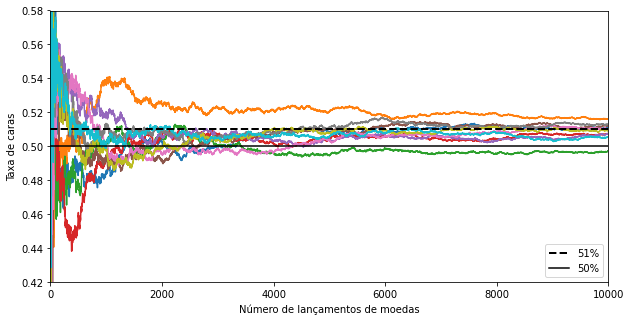

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")

plt.xlabel('Número de lançamentos de moedas')
plt.ylabel('Taxa de caras')
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])

plt.savefig('plot1.1.png')

Criação de um classificador ensemble

In [ ]:
#Carga do conjunto de dados
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Primeiramente são gerados modelos usando *Regressão Logística*, *Florestas Aleatórias* e *SVM*. Em seguida é gerado o classificador de votação a partir da conjunção dos três métodos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
#Treinamento do modelo
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

Uso do classificador ensemble para predizer e calcular a acurácia da predição. Também são comparadas as acurácias dos métodos executados de maneira individual, demonstrando que o ensemble apresenta resultado superior.

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


#2 Bagging e Pasting

Esta abordagem visa usar o mesmo algoritmo e treiná-los diversas vezes com amostragens aleatórias do conjunto de treinamento.

* *Bagging (Bootstrap aggregating)*: Realizar a amostragem com substituição.
* *Pasting*: Realizar a amostragem sem substituição.

As previsões são realizadas agregando previsões de todos os previsores treinados.

In [ ]:
#Criação do modelo
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)

Neste exemplo está sendo usado o método *bagging* (com substituição). Para usar pastig, basta alterar o parâmetro `bootstrap` para False.

---

A seguir é realizado o treinamento e a aplicação do modelo para predição.

In [ ]:
#Treinamento
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [ ]:
#Aplicação para predição
y_pred = bag_clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Para comparação apresentamos na célula anterior o cálculo da acurácia do modelo ensemble e abaixo criamos, treinamos e aplicamos uma árvore de decisão e calculamos a sua acurácia. Como pode ser vista o ensemble apresenta acurácia de 90,4%, enquanto o modelo original apresenta 85,6%.

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


Visualização da fronteira de decisão para comparar uma árvore única e as 500 árvores treinadas pelo modelo *bagging*.

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

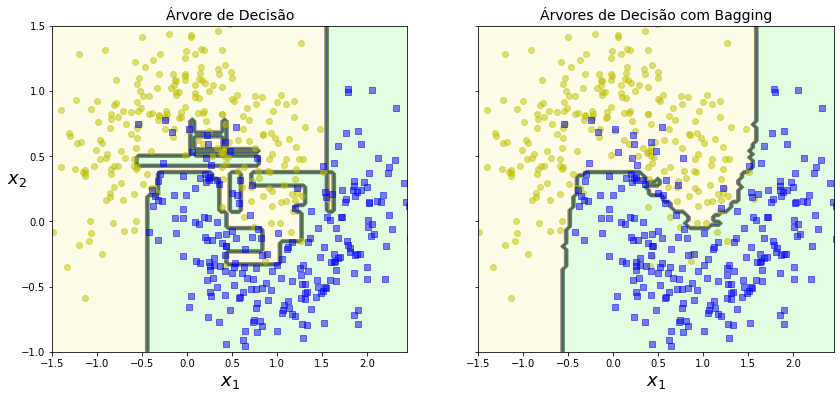

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(14,6), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title('Árvore de Decisão', fontsize=14)

plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title('Árvores de Decisão com Bagging', fontsize=14)

plt.ylabel("")

plt.savefig('plot1.2.png')

#3 Boosting

O *boosting* visa aumentar a acurácia de modelos, pela combinação sequencial e iterativa de classificadores. Isso é feito considerando que dados $k$ classificadores, a iteração vai atualizando os pesos da classificação e usando os resultados para que o próximo classificador aprenda melhor com as falhas de classificação realizadas pelo anterior [Han, 2012]. 

##3.1 AdaBoost

Partindo da abordagem *boosting* o algoritmo *AdaBoost - Adaptive Boosting*, realiza a aplicação iterativa dos classificadores e de acordo com seu erro de classificação determina um peso para o voto de cada classificador. Por fim, para determinar a classificação final, diferentemente do que é feito no *bagging* cujos votos de todos classificadores tem peso igual, realiza a votação com pesos diferentes para cada classificador [Han, 2012].

![Ilustração do Algoritmo AdaBoost](https://www.researchgate.net/profile/Zhuo-Wang-36/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png)

Figura 1: Ilustração do Algoritmo AdaBoost ([Zhuo Wang](https://www.researchgate.net/figure/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple_fig9_288699540))

Implementação do algoritmo no Scikit-Learn.

**OBSERVAÇÃO:** A aplicação abaixo uso o classificador, mas o Scikit-Learn dispõe também de um regressor para usar o *AdaBoost* (`AdaBoostRegressor`).

In [1]:
#Carga do conjunto de dados
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
#Construção do classificador
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate=0.5
)

In [3]:
#Treinamento do modelo
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [5]:
#Aplicação do modelo
y_pred = ada_clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [7]:
#Avaliação da predição do modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        61
           1       0.93      0.86      0.89        64

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



##3.1 Gradient Boosting

O *Gradient Boosting* atua de maneira similar ao *AdaBoost*, contudo, o melhoria sequencial dos previsores é feita buscando ajustar cada novo previsor aos erros residuais do anterior.

In [9]:
#Criação de dados aleatórios
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [24]:
X[:5]

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136]])

In [26]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

In [11]:
#Construção do algoritmo
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)

In [12]:
#Treinamento do modelo
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [13]:
#Separação dos erros residuais para treinar o novo regressor
y2 = y - tree_reg1.predict(X)

In [14]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
#Separação dos erros residuais novamente para obtenção de mais um nível
y3 = y2 - tree_reg2.predict(X)

In [17]:
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [19]:
#Criação de uma nova instância de X para aplicação do ensemble
X_new = np.array([[0.8]])

In [20]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

Forma simplificada para construir o mesmo modelo anterior.

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=3,
                                 learning_rate=1.0)

gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
y_pred2 = gbrt.predict(X_new)
y_pred2

array([0.75026781])

Visualização das predições para comparação entre as árvores separadas e o modelo ensemble.

In [30]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

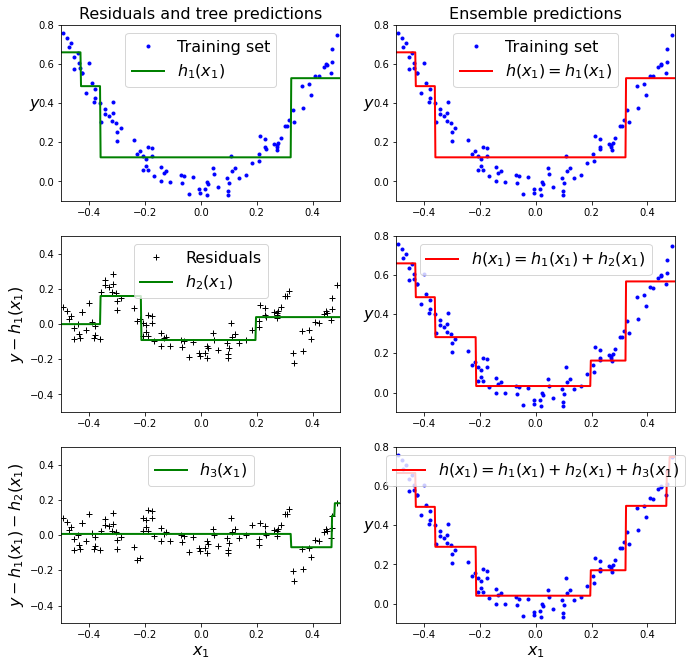

In [31]:
#Código transcrito de: https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.savefig('plot3.1.png')

Para identificar o número ideal de árvores a serem treinadas, pode ser criado um ensemble com um número elevado de árvores e medir o número o erro de validação, em seguida realizar um novo treinamento com este número ideal. Outra opção é ativar o parâmetro `warm_strat=True`, que permite o treinamento incremental. Com este parâmetro ativado pode ser realizado o treinamento e ir comparando a melhoria no erro de validação, parando o treinamento quando não houver melhoria por um número determinado de iterações [Géron, 2019].

#Referências e links

**Referências**

Baur, Eric. Kohavi, Ron (1998). [**An Empirical Comparison of Voting Classification Algorithms:**](http://robotics.stanford.edu/~ronnyk/vote.pdf) Bagging, Boosting, and Variants.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Han, Jiawei. Kamber, Micheline. Pei, Jian (2012) **Data Mining:** Concepts and techniques. Morgan Kaufmann, 3rd Edition.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

---
Conteúdos adicionais e explicações detalhadas do algoritmo em:

https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

https://github.com/janiosl/python.ds/blob/master/ml/randomForest/ML_RandomForest.ipynb